In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Covid Data.csv')
print(df)

         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2         2  ...       2        2 

In [3]:
# Предобработка данных
df = df.replace({97: np.nan, 99: np.nan, 98: np.nan})
df['HIGH_RISK'] = ((df['DATE_DIED'] != '9999-99-99') | (df['ICU'] == 1)).astype(int)

# Заполнение пропущенных значений
df = df.fillna({
    'AGE': df['AGE'].median(),
    'PNEUMONIA': df['PNEUMONIA'].mode()[0],
    'DIABETES': df['DIABETES'].mode()[0],
    'HIPERTENSION': df['HIPERTENSION'].mode()[0]
})

print(f"\nПациентов высокого риска: {df['HIGH_RISK'].sum()} ({df['HIGH_RISK'].mean():.1%})")


Пациентов высокого риска: 85605 (8.2%)


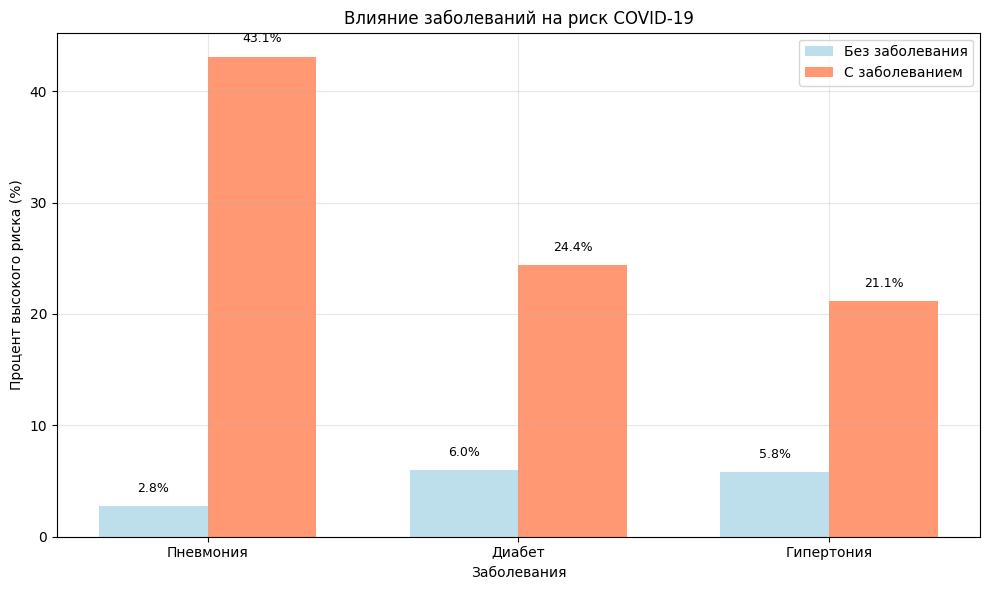

In [14]:
plt.figure(figsize=(10, 6))

diseases = ['PNEUMONIA', 'DIABETES', 'HIPERTENSION']
disease_names = ['Пневмония', 'Диабет', 'Гипертония']
risk_percentages = []

for disease in diseases:
    risk_with = df[df[disease] == 1]['HIGH_RISK'].mean() * 100
    risk_without = df[df[disease] == 2]['HIGH_RISK'].mean() * 100
    risk_percentages.append([risk_without, risk_with])

x = np.arange(len(disease_names))
width = 0.35

plt.bar(x - width/2, [r[0] for r in risk_percentages], width, label='Без заболевания', color='lightblue', alpha=0.8)
plt.bar(x + width/2, [r[1] for r in risk_percentages], width, label='С заболеванием', color='coral', alpha=0.8)

plt.xlabel('Заболевания')
plt.ylabel('Процент высокого риска (%)')
plt.title('Влияние заболеваний на риск COVID-19')
plt.xticks(x, disease_names)
plt.legend()
plt.grid(True, alpha=0.3)

for i, (risk_without, risk_with) in enumerate(risk_percentages):
    plt.text(i - width/2, risk_without + 1, f'{risk_without:.1f}%', ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, risk_with + 1, f'{risk_with:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



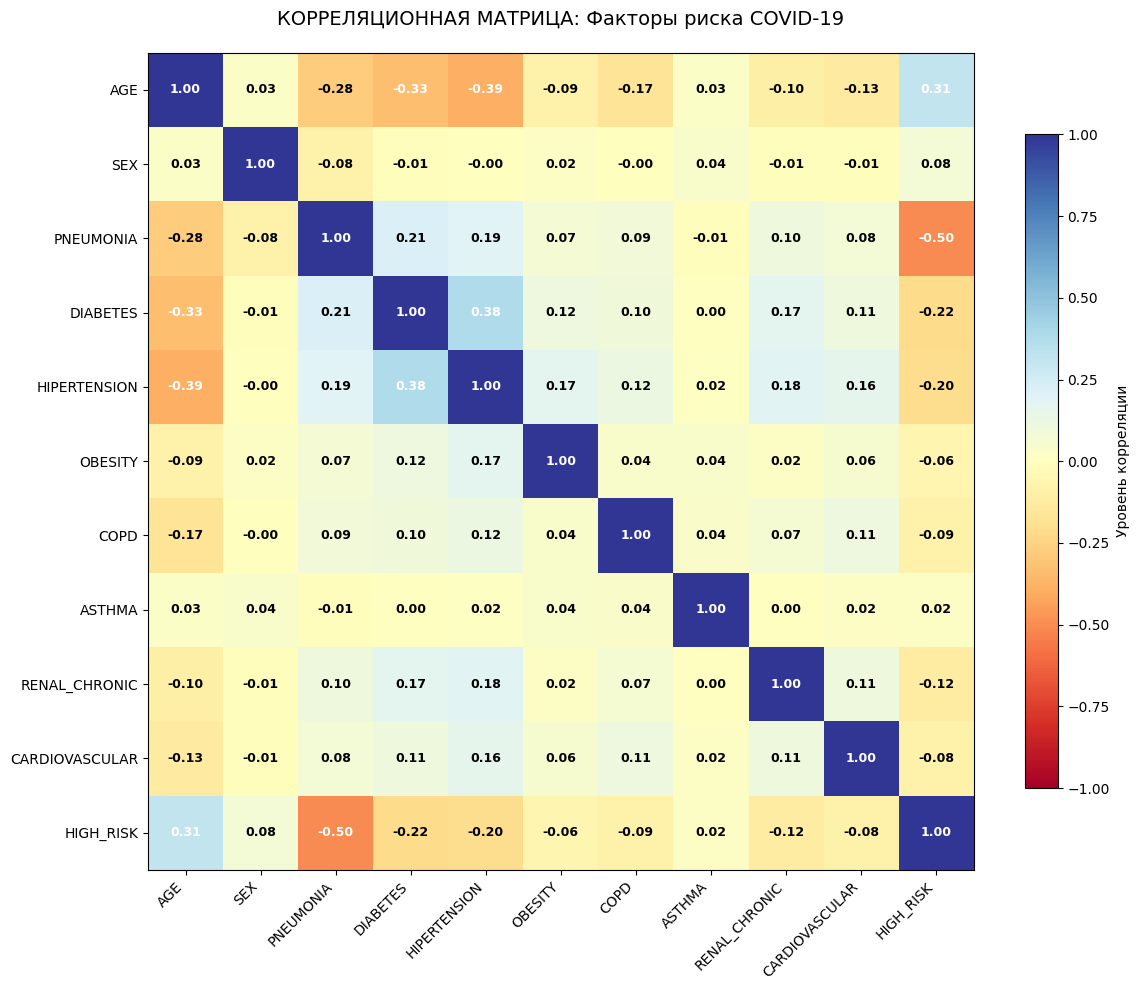

In [16]:
plt.figure(figsize=(12, 10))

numeric_cols = [
    'AGE', 'SEX', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION', 
    'OBESITY', 'COPD', 'ASTHMA', 'RENAL_CHRONIC', 'CARDIOVASCULAR',
    'HIGH_RISK'
]

corr_matrix = df[numeric_cols].corr()

plt.imshow(corr_matrix, cmap='RdYlBu', aspect='auto', vmin=-1, vmax=1)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        color = 'white' if abs(corr_matrix.iloc[i, j]) > 0.3 else 'black'
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=9, 
                color=color, weight='bold')

plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar(label='Уровень корреляции', shrink=0.8)
plt.title('КОРРЕЛЯЦИОННАЯ МАТРИЦА: Факторы риска COVID-19', fontsize=14, pad=20)

plt.grid(False)
plt.tight_layout()
plt.show()


In [19]:
print("\n" + "="*60)
print("ОСНОВНЫЕ ВЫВОДЫ ИЗ АНАЛИЗА:")
print("="*60)
print(f"Всего пациентов: {len(df):,}")
print(f"Пациентов высокого риска: {df['HIGH_RISK'].sum():,} ({df['HIGH_RISK'].mean():.1%})")
print(f"Средний возраст: {df['AGE'].mean():.1f} лет")
print(f"Средний возраст высокого риска: {df[df['HIGH_RISK'] == 1]['AGE'].mean():.1f} лет")
print(f"Средний возраст низкого риска: {df[df['HIGH_RISK'] == 0]['AGE'].mean():.1f} лет")

print("САМЫЕ ВАЖНЫЕ ФАКТОРЫ РИСКА:")
print("1. ВОЗРАСТ - самый сильный предиктор риска")
print("2. ПНЕВМОНИЯ - наиболее опасное сопутствующее заболевание") 
print("3. ДИАБЕТ и ГИПЕРТОНИЯ - значимые факторы риска")
print("4. ХОБЛ и ХБП - умеренное влияние на риск")
print("5. ОЖИРЕНИЕ - слабая, но значимая корреляция")

print("Люди старше 59 лет (имеют больший риск заразиться вирусом --> нужно за ними больше следить)")


ОСНОВНЫЕ ВЫВОДЫ ИЗ АНАЛИЗА:
Всего пациентов: 1,048,575
Пациентов высокого риска: 85,605 (8.2%)
Средний возраст: 41.8 лет
Средний возраст высокого риска: 59.4 лет
Средний возраст низкого риска: 40.2 лет
САМЫЕ ВАЖНЫЕ ФАКТОРЫ РИСКА:
1. ВОЗРАСТ - самый сильный предиктор риска
2. ПНЕВМОНИЯ - наиболее опасное сопутствующее заболевание
3. ДИАБЕТ и ГИПЕРТОНИЯ - значимые факторы риска
4. ХОБЛ и ХБП - умеренное влияние на риск
5. ОЖИРЕНИЕ - слабая, но значимая корреляция
Люди старше 59 лет (имеют больший риск заразиться вирусом --> нужно за ними больше следить)
